<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span><ul class="toc-item"><li><span><a href="#Context" data-toc-modified-id="Context-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Context</a></span></li><li><span><a href="#Plan-of-analysis" data-toc-modified-id="Plan-of-analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plan of analysis</a></span></li></ul></li><li><span><a href="#Install-packages" data-toc-modified-id="Install-packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Install packages</a></span></li><li><span><a href="#Read-in-Data" data-toc-modified-id="Read-in-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read in Data</a></span></li><li><span><a href="#Examine-Structure-of-DF" data-toc-modified-id="Examine-Structure-of-DF-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Examine Structure of DF</a></span></li><li><span><a href="#Examine-Features" data-toc-modified-id="Examine-Features-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Examine Features</a></span><ul class="toc-item"><li><span><a href="#Select-Features" data-toc-modified-id="Select-Features-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Select Features</a></span></li><li><span><a href="#Summary-Statistics" data-toc-modified-id="Summary-Statistics-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Summary Statistics</a></span></li></ul></li><li><span><a href="#Examine-correlations" data-toc-modified-id="Examine-correlations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Examine correlations</a></span><ul class="toc-item"><li><span><a href="#Correlations" data-toc-modified-id="Correlations-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Correlations</a></span></li></ul></li><li><span><a href="#Linear-Model" data-toc-modified-id="Linear-Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Linear Model</a></span><ul class="toc-item"><li><span><a href="#Define-model-methods" data-toc-modified-id="Define-model-methods-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Define model methods</a></span></li><li><span><a href="#Creating-Model-(M1)" data-toc-modified-id="Creating-Model-(M1)-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Creating Model (M1)</a></span></li><li><span><a href="#Sensitivity-Check" data-toc-modified-id="Sensitivity-Check-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Sensitivity Check</a></span><ul class="toc-item"><li><span><a href="#Removing-Taiwan-(M2)" data-toc-modified-id="Removing-Taiwan-(M2)-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Removing Taiwan (M2)</a></span></li><li><span><a href="#Taiwan-Specific-Model-(M3)" data-toc-modified-id="Taiwan-Specific-Model-(M3)-7.3.2"><span class="toc-item-num">7.3.2&nbsp;&nbsp;</span>Taiwan-Specific Model (M3)</a></span></li><li><span><a href="#Hypothesis-Testing:-Chow-test" data-toc-modified-id="Hypothesis-Testing:-Chow-test-7.3.3"><span class="toc-item-num">7.3.3&nbsp;&nbsp;</span>Hypothesis Testing: Chow test</a></span></li></ul></li><li><span><a href="#Analyze-Model" data-toc-modified-id="Analyze-Model-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Analyze Model</a></span></li></ul></li></ul></div>

# Intro

## Context

My research question is: Which dimensions of coffee contribute most to our overall impression? This question interests me as a coffee drinker. But it's also useful for a business or a producer. 

The data that I am using is self-reported ratings of coffee from the Coffee Quality Institute. People rate various dimensions of a coffee, and then give their overall rating. And I'm interested which of those dimensions is most important for forming an overall impression. The dimensions are: 

1. Acidity 
2. Aftertaste
3. Aroma
4. Balance
5. Body
6. Clean Cup
7. Flavor
8. Uniformity 
9. Sweetness 


My hypothesis is that aftertaste will be particularly important due to the "peak-end rule" (the tendency to upweight the end of experiences when we encode them).

## Plan of analysis 

After inspecting my data and looking at descriptive statistics, I will get at my research questions two ways. First, which rating component is most correlated with a reviewer's overall rating? This is a simple approach. Second, I will build a heteroskedacity robust linear model. This will allow me to say: "Holding all other features constant, which component has the highest impact on overall rating?"

# Install packages

In [1499]:
import io
import requests
import requests
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

First let's read in the DF. 

# Read in Data

In [1500]:
# Read in DF
url="https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

Now we examine the structure of the dataframe. 

# Examine Structure of DF

In [1501]:
# Examine structure
df.head()
display("Length: {}".format(len(df)))
display(df.columns)
display(df.dtypes, "\n")
display(df.head())

df.rename(columns={'Cupper.Points': 'Rating'}, inplace=True)
df.rename(columns={'Clean.Cup': 'Clean Cup'}, inplace=True)
display(df.columns)

'Length: 1311'

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

Unnamed: 0                 int64
Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.

'\n'

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 'Rating',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

# Examine Features

## Select Features

In [1502]:

# Extract some features 
X = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean Cup', 'Sweetness']
# And store our dv
Y = ['Rating']

# Drop 0s and NaNs
df = df[(df[['Rating']] != 0).all(axis=1)]
df.dropna(subset=X+Y, how="any", inplace=True)

# Drop countries with just one obs.
country_counts = df['Country.of.Origin'].value_counts().reset_index()
one_countries = values[values[values.columns[1]] < 2]
one_countries = ones["index"].tolist()
df = df[~df["Country.of.Origin"].isin(one_countries)]
print(one_countries)

dfAll = df[X + Y]
dfX = df[X]
dfY = df[Y]

['Papua New Guinea', 'Rwanda', 'Mauritius', 'India', 'Japan', 'Ecuador', 'Cote d?Ivoire', 'Zambia']


## Summary Statistics

In [1503]:
dfAll.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Rating
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,7.568917,7.523441,7.403134,7.539485,7.522719,7.522811,9.841982,9.840676,9.913356,7.503095
std,0.315808,0.341355,0.349964,0.318496,0.292756,0.349156,0.489660,0.724018,0.447118,0.427466
min,5.080000,6.080000,6.170000,5.250000,5.250000,6.080000,6.000000,0.000000,1.330000,5.170000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000
50%,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000


A couple of things here. 

1. First of all, there's *very* lttle variance in ratings. All ratings are constrained between 5-8. But come on, everyone has had really crappy coffee before. 

2. Second, many of the features hover around a 7. 

3. Third, clean cup and uniformity have the most variance, and these features are the most abstract, so that makes sense. 

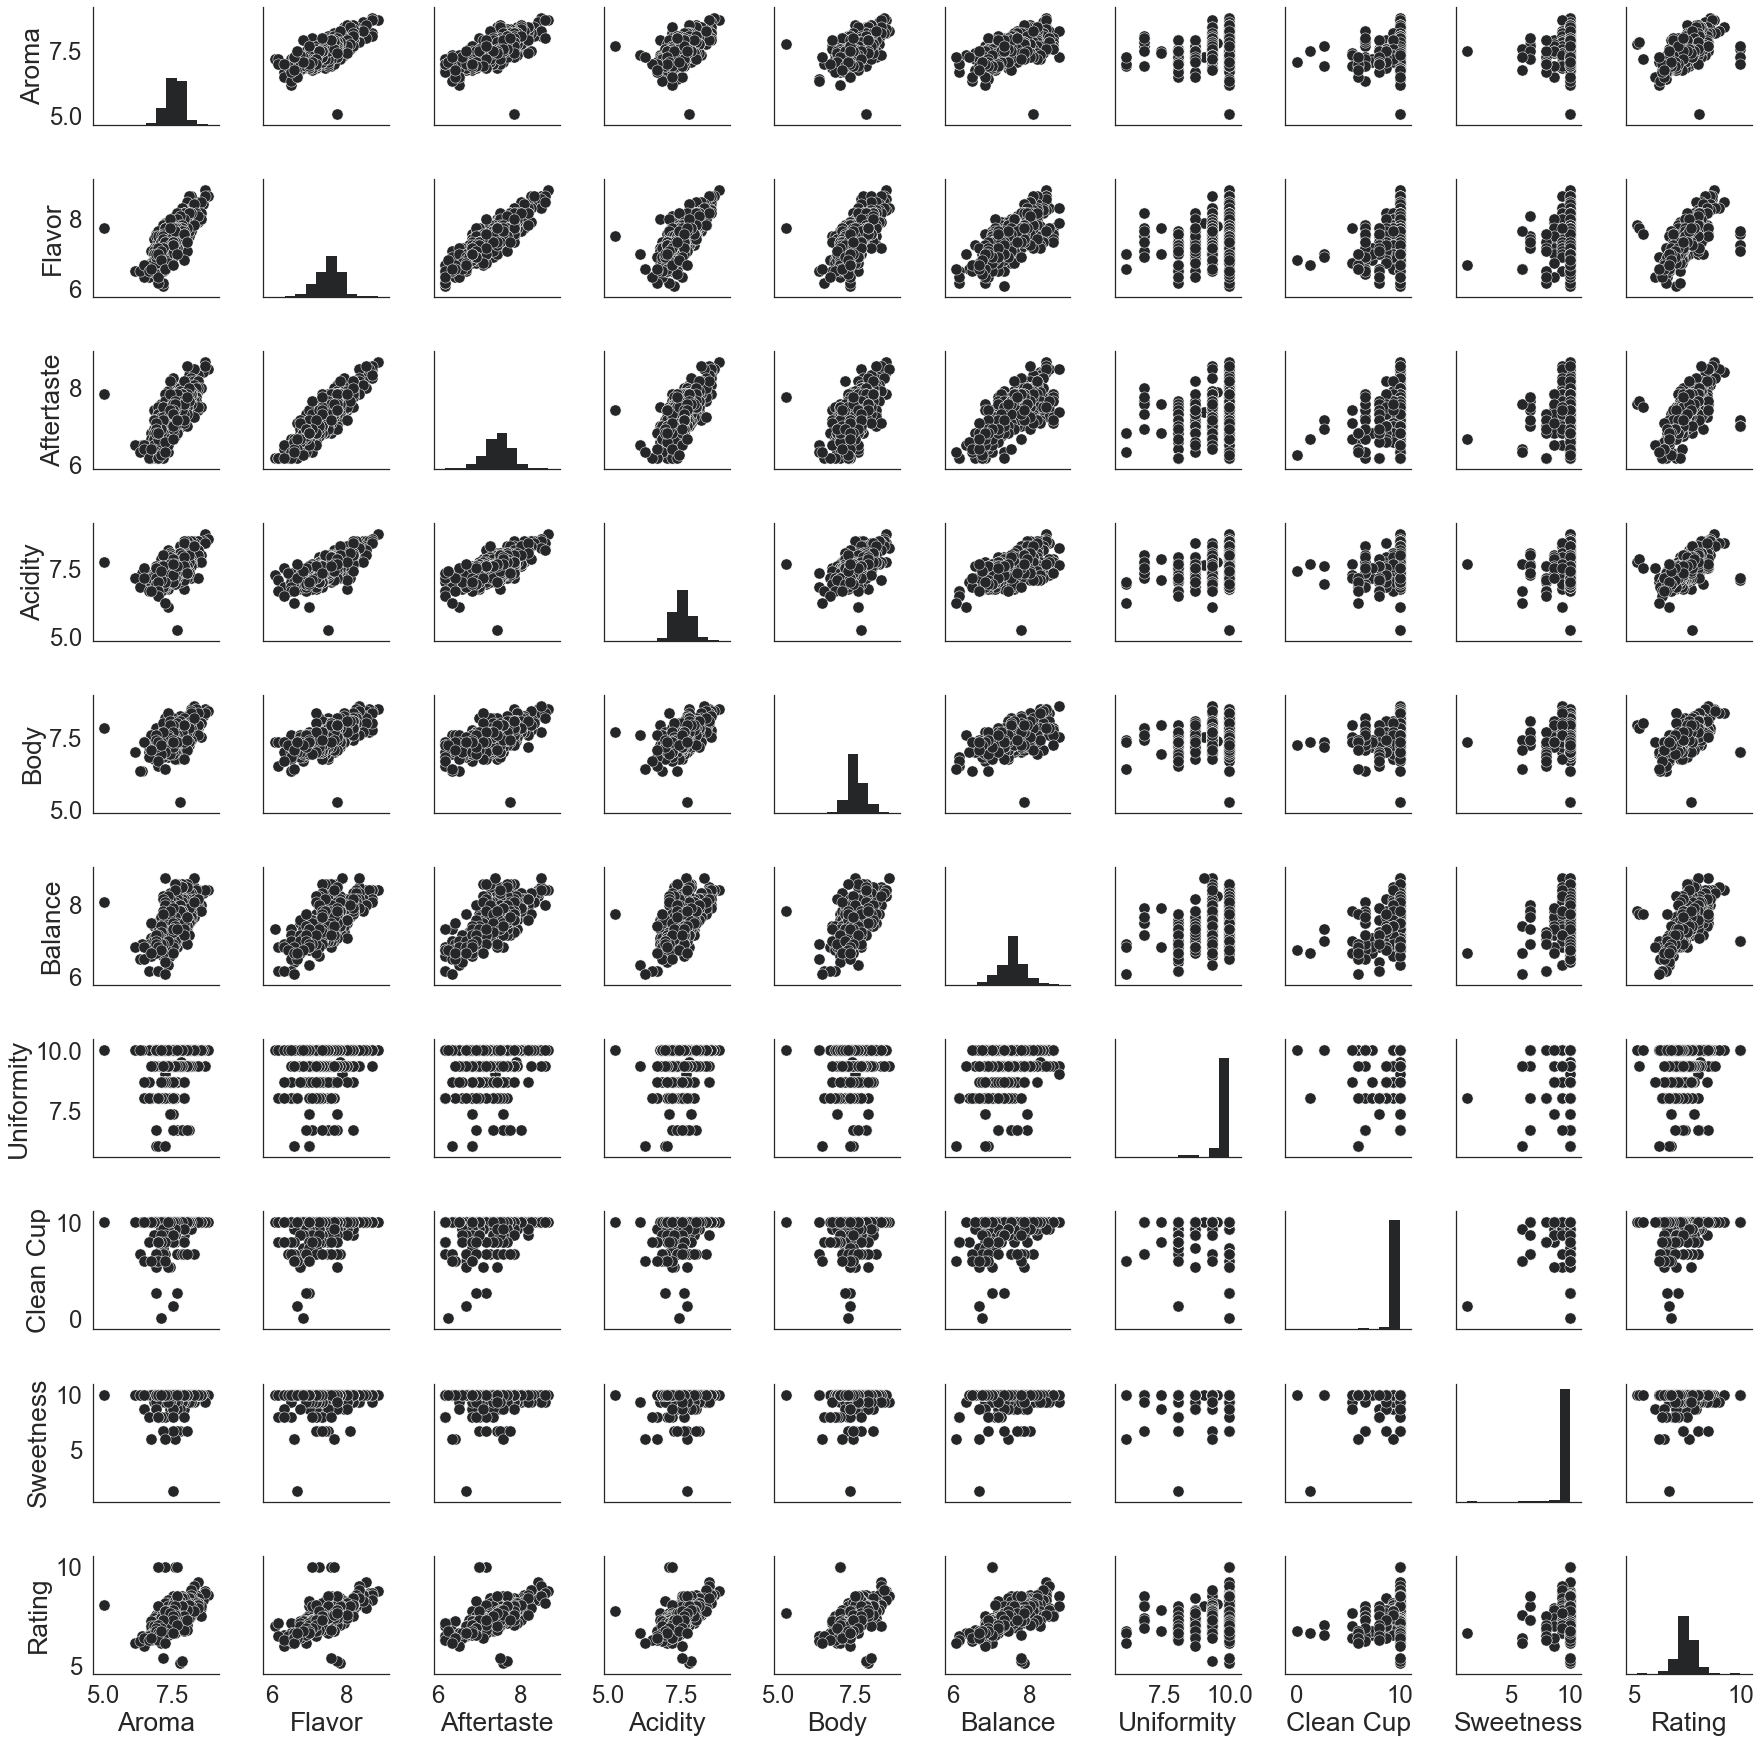

In [1504]:
# Let's just set up the enviorment for graphing 
def config_graph(colors, font_scale):
    """
    Configures the Seaborn plotting settings such that
    (1) fonts are bigger
    (2) white background of charts
    (3) my blog's colors are used
    (4) Arial is the default font 
    """
    sns.set(context="poster", style="white", font_scale=1.5, palette=colors)
    plt.rcParams['font.sans-serif'] = "Arial" # Arial as default sans serif font
    plt.rcParams["font.family"] = "sans-serif"# Always use sans serif 
 
my_colors = ["#252627", "#0B132B", "#E6D3A3"]
font_scale = 1.5
config_graph(my_colors, font_scale)

a = sns.pairplot(dfAll)
plt.show()

# Examine correlations 

## Correlations

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Rating
Aroma,1.000000,0.739945,0.692823,0.607160,0.553169,0.605048,0.137096,0.182283,0.063737,0.602589
Flavor,0.739945,1.000000,0.858931,0.744337,0.661597,0.729787,0.212905,0.269956,0.129060,0.741485
Aftertaste,0.692823,0.858931,1.000000,0.714917,0.664481,0.761004,0.204991,0.259666,0.111467,0.729752
Acidity,0.607160,0.744337,0.714917,1.000000,0.609757,0.642470,0.148543,0.140643,0.056799,0.613945
Body,0.553169,0.661597,0.664481,0.609757,1.000000,0.671795,0.081100,0.110309,0.035264,0.569143
Balance,0.605048,0.729787,0.761004,0.642470,0.671795,1.000000,0.209710,0.243927,0.108955,0.669254
Uniformity,0.137096,0.212905,0.204991,0.148543,0.081100,0.209710,1.000000,0.433049,0.385715,0.187558
Clean Cup,0.182283,0.269956,0.259666,0.140643,0.110309,0.243927,0.433049,1.000000,0.438787,0.243275
Sweetness,0.063737,0.129060,0.111467,0.056799,0.035264,0.108955,0.385715,0.438787,1.000000,0.099452
Rating,0.602589,0.741485,0.729752,0.613945,0.569143,0.669254,0.187558,0.243275,0.099452,1.000000


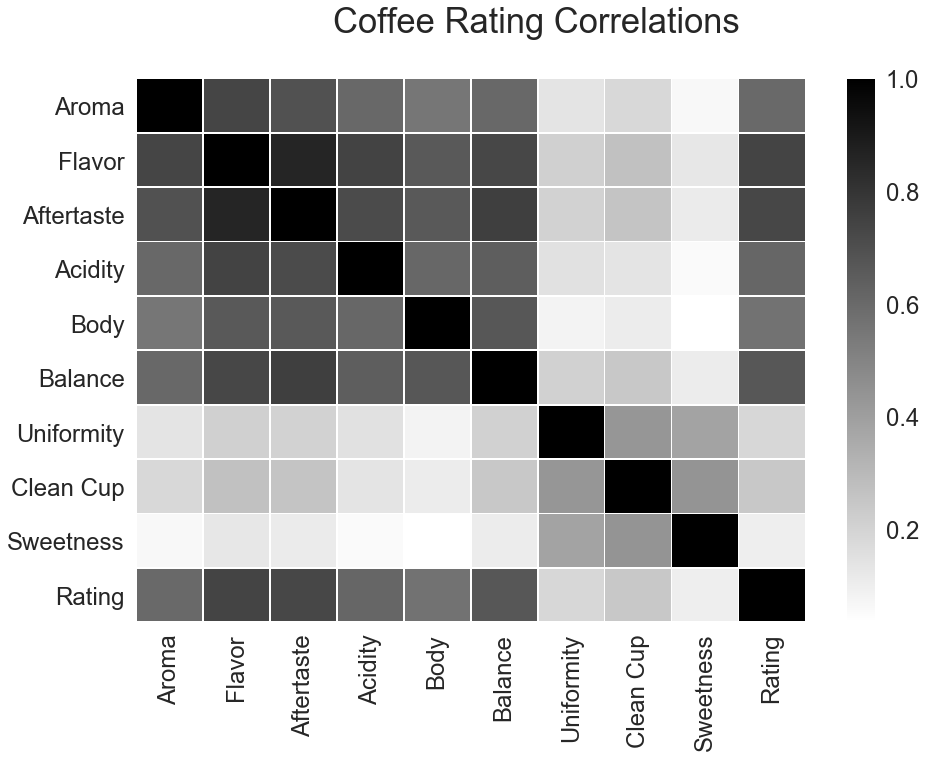

In [1505]:
# Correlation table
corr = dfAll.corr()
display(corr)
plt.figure(figsize=(15,10))
ax = sns.heatmap(corr, cmap="gist_gray_r", linewidths=0.7)
config_graph(my_colors, 1.5)
plt.suptitle('Coffee Rating Correlations \n')
# plt.savefig("cor_matrix.png", dpi=500, bbox_inches="tight", transparent=True)
plt.show()

It looks like rating is most correlated with flavor, aftertaste, balance -- and least correlated with sweetness. Though most of these features are very correlated. So this means our regression model will probably have some multicollinearity problems (i.e: Partial effects will be hard to determine when our predictors are correlated). 

In [1506]:
# PCA analysis 
from sklearn import decomposition
pca = decomposition.PCA(n_components=4)
pca.fit(dfX).transform(dfX)
pca_df = pd.DataFrame(pca.components_, columns=dfX.columns).transpose()
display(pca_df)
print("Explained variance by component:", pca.explained_variance_ratio_)

,0,1,2,3
Aroma,-0.175554,0.324079,-0.021246,-0.024271
Flavor,-0.241437,0.377011,-0.005640,-0.034673
Aftertaste,-0.242591,0.388776,-0.010355,-0.022957
Acidity,-0.170903,0.350227,0.018811,-0.022425
Body,-0.138061,0.314253,-0.017533,-0.049328
Balance,-0.228558,0.361384,0.006692,-0.011243
Uniformity,-0.348415,-0.150816,0.766294,0.515912
Clean Cup,-0.741671,-0.422006,-0.504175,0.122252
Sweetness,-0.282952,-0.221003,0.396618,-0.844694


Explained variance by component: [ 0.45570559  0.25073289  0.11277458  0.08068087]


The first three PCS correspond to something like lightness,  potency, and tanginess. 

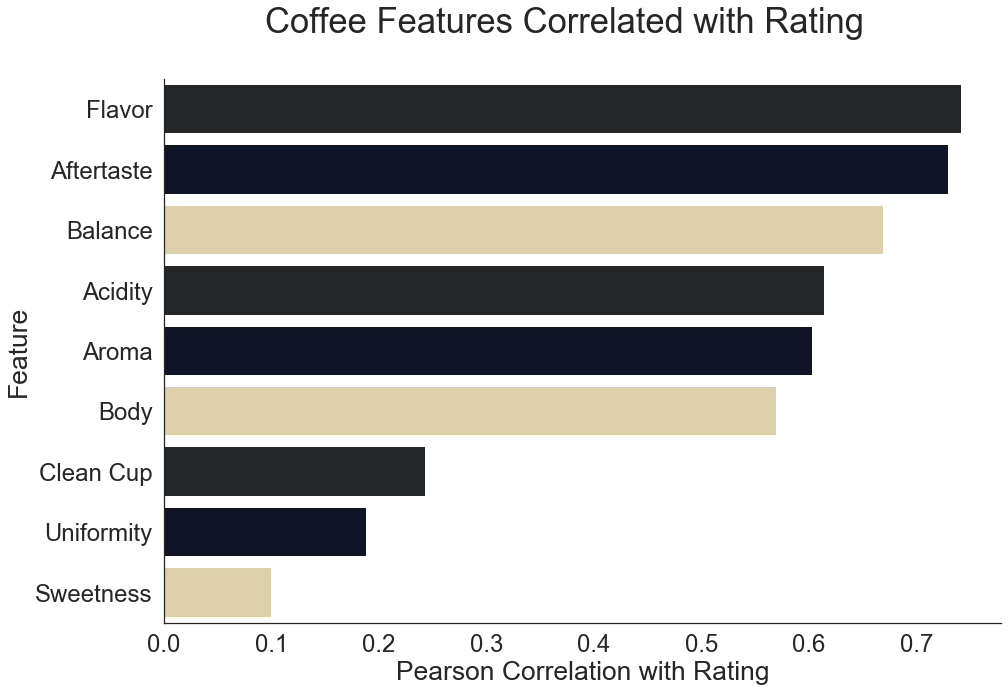

In [1507]:
# Graph highest correlations with rating 

a= pd.DataFrame(corr["Rating"]).reset_index()
a.columns = ["Feature", "Cor"]
a.sort_values(['Cor'], ascending=False, inplace=True)
a = a.iloc[1:] # drop own correlation

# Graph coefficents
config_graph(my_colors, 1.5)
plt.figure(figsize=(15,10))
sns.barplot(data=a, y="Feature", x="Cor", palette=my_colors)
sns.despine()
plt.suptitle("Coffee Features Correlated with Rating \n")
plt.xlabel("Pearson Correlation with Rating")
# plt.savefig("rating_cor.png", dpi=500, bbox_inches="tight", transparent=True)
plt.show()


# Linear Model

For our linear model, we will do a heteroskedacity-robust fixed-effect OLS model. 

* Robust: A constant error term ("Homoskedacity") is an assumption of OLS. This assumption says that the error term is constant for all values of X. But judging by the pairplots, it looked like some relationships exhibited heteroskedacity. At higher levels of a variable, there was more variance. 


* Fixed Effects: Second, we will use country-level fixed effects. You can think about fixed effects two ways. One way is that this is just dummying every country relative to the reference country (country with median coffee ratings). Or you can view this as estimating a seperate inercept for each country. Both are equivalent. We are just saying that some countries have better or worse ratings because of (1) things we can't capture in our model that are (2) specific to this country and (3) not changing over time. 

I considered using the PCs instead of raw features in a regression. Judging by correlations, there will be a lot of multicollinearity. But I am interested in these specific features, so let's power through. 

## Define model methods

In [1508]:
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from statsmodels.stats.stattools import omni_normtest
from statsmodels.stats.outliers_influence import OLSInfluence


def get_median_country(dataframe, feature):
    """
    Finds a country who is the median on some variable - 
    returns this country as a string
    """
    cdf = (data.groupby(["Country"]).mean()).reset_index()
    cdf.sort_values(feature, ascending=True, inplace=True)
    middle = int(len(cdf)/2)
    median_country = str(cdf.iloc[middle]["Country"])
    print("Using {} as comparison group \n".format(median_country) )
    return median_country
    

def analyze_residuals(dataframe, model):
    """
    Analyze residuals - 

    Prints summary statistics, graphs residuals, 
    look at countries with high and low residuals, and see
    influential points (by Cooks D)
    """
    
    influence = OLSInfluence(model)
    dataframe["Resid"] = influence.resid_studentized_internal.tolist()
    dataframe["Cooks D"] = influence.cooks_distance[0].tolist()
    
    # Look at residual summary statistics 
    print ('-'*30 + 'Residuals' + '-'*30)
    print (dataframe['Resid'].describe())
    print ('\n')

    # Print overperformers (large positive residuals)
    print("*"*20, "Overperformers", "*"*20)
    overperformers = dataframe.sort_values(["Resid"], ascending=True)
    display(overperformers.tail(5))

    # Print underperformers (large negative residuals)
    print("*"*20, "Underperformers", "*"*20)
    underperformers = dataframe.sort_values(["Resid"], ascending=True)
    display(underperformers.head(5))

    # Print influential points (Large Cooks Distance)
    print("*"*20, "Influential Points", "*"*20)
    i_sort = dataframe.sort_values(["Cooks D"], ascending=True)
    display(i_sort.tail(5))


## Creating Model (M1)

In [1509]:
url="https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv"
s=requests.get(url).content
data =pd.read_csv(io.StringIO(s.decode('utf-8')))

# Select data 
features = ['Country.of.Origin', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points']
data = data[features]

# Drop NaNs and 0s 
data.dropna(how="any", inplace=True)
data = data[data['Cupper.Points'] > 0]

# Drop countries with one observaiton
data = data[~data["Country.of.Origin"].isin(one_countries)]


# Rename columns to use with Patsy (we need no spaces/periods in var names)
data.rename(columns={
                'Cupper.Points': 'Rating', 
                'Clean.Cup': 'Clean', 
                'Country.of.Origin': 'Country'
}, inplace=True)

#Find country to use as comparison group for FE
comparison = get_median_country(data, "Rating")

# Make model 
model1 = smf.ols(formula="""Rating ~ Aroma + Aftertaste + Acidity 
                        + Body + Balance + Clean + Flavor + Sweetness 
                        + Uniformity + C(Country, Treatment("{}"))
                        """.format(comparison), data=data).fit(cov_type = 'HC3')
print(model1.summary())
analyze_residuals(data, model1)
print("\n MSE:", model1.mse_total)

Using El Salvador as comparison group 

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     94.33
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:07:48   Log-Likelihood:                -118.33
No. Observations:                1301   AIC:                             310.7
Df Residuals:                    1264   BIC:                             502.0
Df Model:                          36                                         
Covariance Type:                  HC3                                         
                                                                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

,Country,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean,Sweetness,Rating,Resid,Cooks D
839,Brazil,7.58,7.00,6.92,6.92,7.67,7.5,10.0,10.0,10.0,8.25,4.117036,0.009478
352,Taiwan,7.58,7.58,7.17,7.17,7.00,7.0,10.0,10.0,10.0,10.00,9.961214,0.058290
379,Taiwan,7.67,7.67,7.00,7.08,7.00,7.0,10.0,10.0,10.0,10.00,10.003829,0.077773
636,Taiwan,7.25,7.25,7.00,7.08,7.00,7.0,10.0,10.0,10.0,10.00,10.728272,0.053837
735,Taiwan,7.00,7.08,7.00,7.17,7.00,7.0,10.0,10.0,10.0,10.00,11.034973,0.057543


******************** Underperformers ********************


,Country,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean,Sweetness,Rating,Resid,Cooks D
962,Taiwan,7.83,7.75,7.67,7.83,7.83,7.75,9.33,10.0,10.0,5.25,-9.559147,0.044099
836,Indonesia,7.75,7.83,7.58,7.75,7.92,7.83,10.00,10.0,10.0,5.17,-9.545326,0.134106
1015,Kenya,7.17,7.58,7.50,7.50,8.00,7.75,10.00,10.0,10.0,5.42,-7.912385,0.087927
1021,Taiwan,7.92,7.67,7.33,7.08,7.08,7.08,10.00,10.0,10.0,6.75,-2.677176,0.004807
269,Taiwan,8.00,7.92,7.92,7.92,7.67,7.33,10.00,10.0,10.0,7.17,-2.595149,0.003906


******************** Influential Points ********************


,Country,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean,Sweetness,Rating,Resid,Cooks D
352,Taiwan,7.58,7.58,7.17,7.17,7.00,7.00,10.00,10.0,10.0,10.00,9.961214,0.058290
379,Taiwan,7.67,7.67,7.00,7.08,7.00,7.00,10.00,10.0,10.0,10.00,10.003829,0.077773
1015,Kenya,7.17,7.58,7.50,7.50,8.00,7.75,10.00,10.0,10.0,5.42,-7.912385,0.087927
992,United States (Puerto Rico),7.67,7.75,7.67,7.58,7.58,7.67,6.67,10.0,10.0,8.50,3.242299,0.110111
836,Indonesia,7.75,7.83,7.58,7.75,7.92,7.83,10.00,10.0,10.0,5.17,-9.545326,0.134106



 MSE: 0.182818092118


## Sensitivity Check
Now, note that almost all of the largest (absolute value) outliers were from Taiwan. So let's see what happens (1)  when we remove Taiwan and (2) when we look at just Taiwan. 

### Removing Taiwan (M2)

In [1510]:
data2 = data[data['Country'] != "Taiwan"]

#Find country to use as comparison group for FE
comparison = get_median_country(data2, "Rating")

# Make model 
model2 = smf.ols(formula="""Rating ~ Aroma + Aftertaste + Acidity 
                        + Body + Balance + Clean + Flavor + Sweetness 
                        + Uniformity + C(Country, Treatment("{}"))
                        """.format(comparison), data=data2).fit(cov_type = 'HC3')




print(model2.summary())
analyze_residuals(data2, model2)
print("\n MSE:", model2.mse_total)

Using El Salvador as comparison group 

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     120.5
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:07:48   Log-Likelihood:                 230.40
No. Observations:                1226   AIC:                            -388.8
Df Residuals:                    1190   BIC:                            -204.8
Df Model:                          35                                         
Covariance Type:                  HC3                                         
                                                                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

,Country,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean,Sweetness,Rating,Resid,Cooks D
992,United States (Puerto Rico),7.67,7.75,7.67,7.58,7.58,7.67,6.67,10.0,10.00,8.50,4.199646,0.191446
513,Colombia,7.75,7.42,7.33,7.50,7.58,7.17,10.00,10.0,10.00,8.25,4.260109,0.005654
1055,Colombia,7.67,7.50,7.42,7.67,7.50,7.75,10.00,10.0,6.67,8.50,4.477047,0.038805
367,Mexico,7.83,7.58,7.25,7.50,7.50,7.42,10.00,10.0,10.00,8.42,4.701792,0.004329
839,Brazil,7.58,7.00,6.92,6.92,7.67,7.50,10.00,10.0,10.00,8.25,5.345639,0.017106


******************** Underperformers ********************


,Country,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean,Sweetness,Rating,Resid,Cooks D
836,Indonesia,7.75,7.83,7.58,7.75,7.92,7.83,10.00,10.0,10.00,5.17,-12.665049,0.243385
1015,Kenya,7.17,7.58,7.50,7.50,8.00,7.75,10.00,10.0,10.00,5.42,-10.472690,0.160279
1287,Guatemala,6.50,6.33,6.50,7.50,7.33,6.83,8.67,10.0,8.67,6.00,-2.809624,0.009763
567,Colombia,7.83,7.67,7.50,7.58,7.50,7.67,10.00,10.0,10.00,7.08,-2.747108,0.001382
728,Mexico,7.67,7.58,7.50,7.58,7.50,7.50,10.00,10.0,10.00,7.00,-2.722586,0.001071


******************** Influential Points ********************


,Country,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean,Sweetness,Rating,Resid,Cooks D
1055,Colombia,7.67,7.50,7.42,7.67,7.50,7.75,10.00,10.0,6.67,8.50,4.477047,0.038805
509,United States (Puerto Rico),7.67,7.50,7.67,7.83,7.75,7.83,10.00,10.0,9.33,7.42,-2.072858,0.041801
1015,Kenya,7.17,7.58,7.50,7.50,8.00,7.75,10.00,10.0,10.00,5.42,-10.472690,0.160279
992,United States (Puerto Rico),7.67,7.75,7.67,7.58,7.58,7.67,6.67,10.0,10.00,8.50,4.199646,0.191446
836,Indonesia,7.75,7.83,7.58,7.75,7.92,7.83,10.00,10.0,10.00,5.17,-12.665049,0.243385



 MSE: 0.161245421913


It looks like the model improves on all fronts. R2 goes up by 0.15, skew goes down, kurtosis goes down, our standard errors are much smaller, etc. I wish I knew what was so different about Taiwanese coffee!

### Taiwan-Specific Model (M3)

In [1511]:
data3 = data[data['Country'] == "Taiwan"]
model3 = smf.ols(formula="""Rating ~ Aroma + Aftertaste + Acidity 
                        + Body + Balance + Clean + Flavor + Sweetness 
                        + Uniformity
                        """, data=data3).fit(cov_type = 'HC2')
print(model3.summary())
print("\n MSE:", model3.mse_total)

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     5.395
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           1.67e-05
Time:                        17:07:51   Log-Likelihood:                -74.067
No. Observations:                  75   AIC:                             168.1
Df Residuals:                      65   BIC:                             191.3
Df Model:                           9                                         
Covariance Type:                  HC2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9709      4.829      0.408      0.6

Judging by the R-squared, it is just difficult to predict ratings of Taiwanese coffee. Or at least: The indivudal components of a rating do not explain a sizable amount of variation in a taster's overall rating. 

Also, aftertaste is negative. This means that the more one enjoys the aftertaste of Taiwanese coffee, holding all else in the model constant, that coffee gets a worse rating. That's very interesting. Let's take a look at the Taiwan-specific correlation matrix. 

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean,Sweetness,Rating
Aroma,1.000000,0.833353,0.746094,0.637616,0.426021,0.472580,-0.057260,0.043512,-0.019363,0.113923
Flavor,0.833353,1.000000,0.781180,0.719711,0.456241,0.467466,0.096950,0.229227,0.109208,0.248371
Aftertaste,0.746094,0.781180,1.000000,0.696208,0.487741,0.536699,0.052081,0.310224,0.084866,0.006993
Acidity,0.637616,0.719711,0.696208,1.000000,0.611246,0.595298,-0.002354,0.049613,0.099923,0.087712
Body,0.426021,0.456241,0.487741,0.611246,1.000000,0.770367,-0.151711,-0.029549,-0.221638,-0.085348
Balance,0.472580,0.467466,0.536699,0.595298,0.770367,1.000000,-0.090000,-0.039906,-0.267196,0.006043
Uniformity,-0.057260,0.096950,0.052081,-0.002354,-0.151711,-0.090000,1.000000,0.220709,0.103264,0.102537
Clean,0.043512,0.229227,0.310224,0.049613,-0.029549,-0.039906,0.220709,1.000000,0.562607,0.107926
Sweetness,-0.019363,0.109208,0.084866,0.099923,-0.221638,-0.267196,0.103264,0.562607,1.000000,0.049130
Rating,0.113923,0.248371,0.006993,0.087712,-0.085348,0.006043,0.102537,0.107926,0.049130,1.000000


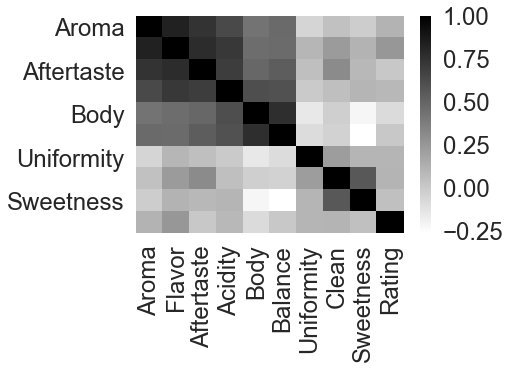

In [1512]:
# Taiwan correlation analysis 
taiwan = data[data['Country'] == "Taiwan"]
t_df = taiwan[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean', 'Sweetness', 'Rating']]
corr = t_df.corr()
display(corr)
a = sns.heatmap(corr, cmap = "binary")
plt.show()

Rating is less correlated with the features than in the general data. 

### Hypothesis Testing: Chow test

The Chow Test tests the hypothesis that coefficents between models differ, or that there is some "break" in the data. I think there is a structural break with Taiwan; one set of coefficents describe non-Taiwan coffee ratings and another describes Taiwan coffee ratings. 

H0: For all coefficents on features 1-9 + intercept, beta differs for Taiwan vs non-Taiwan data. 

HA: For at least one coefficent on features 1-9 + intercept, beta differs for Taiwan vs non-Taiwan data. 

I reject H0 if F-hat > the critical value for an F(20, 1281) dist at a probability level of 0.05.  
That critical value is 1.57874508


https://www.wikiwand.com/en/Chow_test

In [1513]:
# Compute F-Statistic

SSU = ((model1.resid)**2).sum() # unrestricted model (M1)
SS2 = ((model2.resid)**2).sum() # M2
SS3 = ((model3.resid)**2).sum() # M3
num = (SSU-(SS2+SS3))/10
denom = (SS2+SS3)/(1301-20)
fhat = num/denom
print(fhat)

16.5014702179


As expected, we reject the nul hypothesis. That is, a different set of coefficients describe data of Taiwanese coffee vs non Taiwanese coffee. 

## Analyze Model

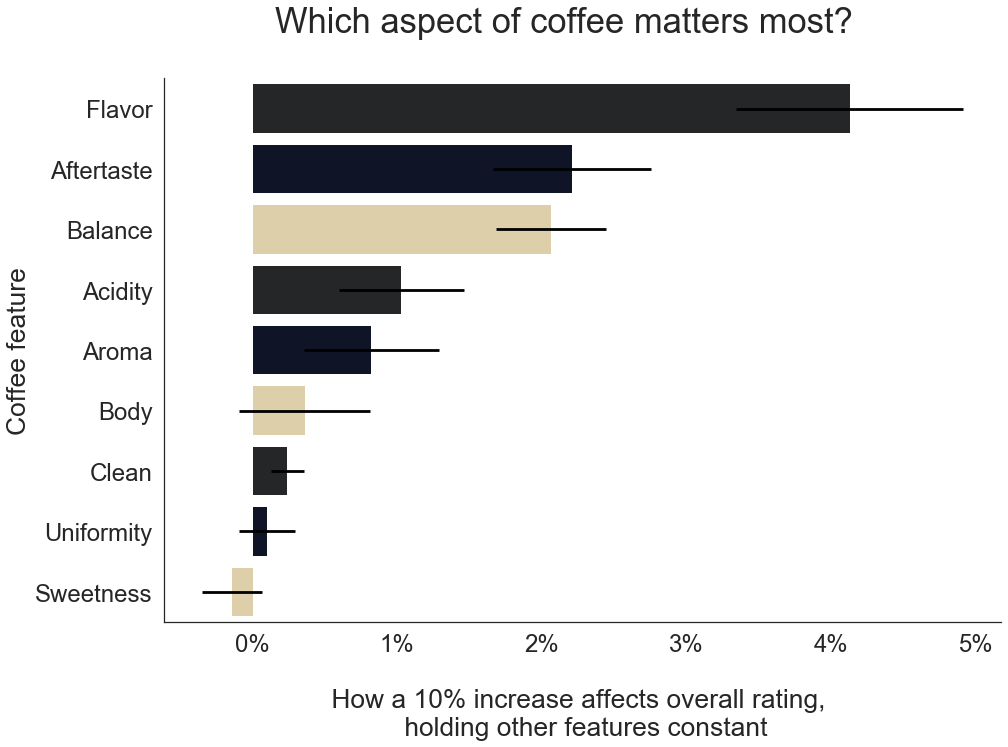

In [1514]:
# Make graph of regression coefficients

# Note that since all ratings are constrained between 1 and 10, 
# A 1 point increase on a 10 point scale is a 10% increase
# So, let's multiply the coefficents and SEs by 10 and think about these effects
# On a percentage level ese effects on a percentage level 


feats = ['Flavor', 'Clean', 'Balance', "Body", 'Acidity', 'Aftertaste', 'Aroma', 'Sweetness', 'Uniformity']
betas = [10*model1.params[feat] for feat in feats]
ses = [10*model1.bse[feat] for feat in feats]
data = {
    "Variables": feats, 
    "Betas": betas,
    "Errors":ses
}
plt.figure(figsize=(15,10))
res = pd.DataFrame(data)
res.sort_values("Betas", inplace=True, ascending=False)
config_graph(my_colors, 1.5)
a = sns.barplot(data=res, x="Betas", y="Variables", palette=my_colors,  **{'xerr':res["Errors"]})
plt.xlabel("\n How a 10% increase affects overall rating,  \n holding other features constant")
plt.ylabel("Coffee feature") 
plt.suptitle("Which aspect of coffee matters most? \n")
sns.despine()
fmt = '%.0f%%'
xticks = mtick.FormatStrFormatter(fmt)
a.xaxis.set_major_formatter(xticks)
# plt.savefig("reg_results.png", dpi=500, bbox_inches="tight", transparent=True)
plt.show()

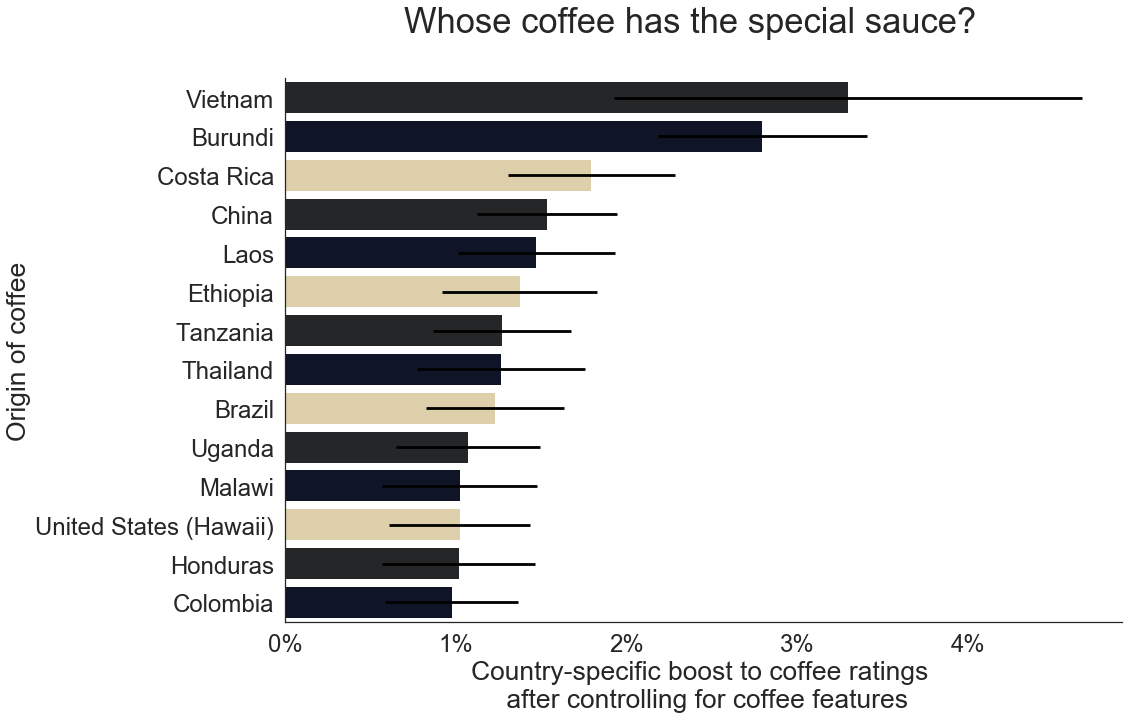

In [1516]:
import matplotlib.ticker as mtick


# Make graph of fixed effects

# Note that since all ratings are constrained between 1 and 10, 
# A 1 point increase on a 10 point scale is a 10% increase
# So, let's multiply the coefficents and SEs by 10 and think about these effects
# On a percentage level 


# Get our list of reported fixed effects 
countries = [x for x in model1.params.index if "Country" in x]

# Get the betas for te FEs
betas = [10*model1.params[c] for c in countries]

# Get the SEs for the FEs
ses = [10*model1.bse[c] for c in countries]

# Get the P-values for the FEs
pvals = [model1.pvalues[c] for c in countries]

# Extract country name from coefficient string
# They are reported like "C(Country, Treatment("El Salvador"))[T.Brazil] ""
countries = [c[39:-1] for c in countries ]
countries = ["Tanzania" if "Tanzania" in x else x for x in countries]
data = {
    "Countries": countries, 
    "Betas": betas,
    "Errors":ses,
    "Pval":pvals
}
plt.figure(figsize=(15,10))
res = pd.DataFrame(data)
res = res[res["Pval"] <= 0.05]
res.sort_values("Betas", inplace=True, ascending=False)
config_graph(my_colors, 1.5)
a = sns.barplot(data=res, x="Betas", y="Countries", palette=my_colors,  **{'xerr':res["Errors"]})
plt.xlabel("Country-specific boost to coffee ratings \n after controlling for coffee features")
plt.ylabel("Origin of coffee")

plt.suptitle("Whose coffee has the special sauce?")
fmt = '%.0f%%'
xticks = mtick.FormatStrFormatter(fmt)
a.xaxis.set_major_formatter(xticks)
sns.despine()
# plt.savefig("fe_results.png", dpi=500, bbox_inches="tight", transparent=True)
plt.show()